In [1]:
#Install
#!pip install cartopy
#!pip install cartopy matplotlib

#!pip uninstall -y shapely
#!pip install shapely --no-binary shapely
#!pip install shapely

#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

import cartopy, cartopy.crs as ccrs          #-------> biblioteca para plote de mapas
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt  
import numpy as np

#coletar mapas de municípios em .json
#https://github.com/tbrugz/geodata-br



import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
#!pip uninstall contextily

In [3]:
#!pip install contextily

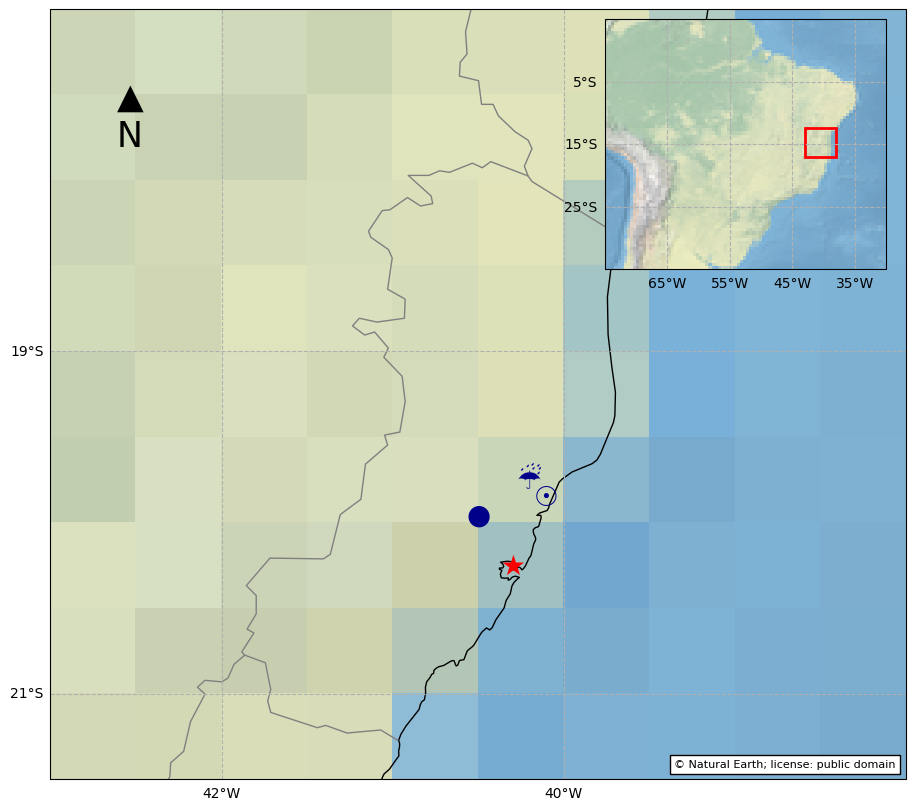

In [4]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


def main():
    # Create a figure and subplots, one for the main map and one for the inset map
    fig = plt.figure(figsize=(12, 10))
    ax_main = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax_inset = fig.add_axes([0.61, 0.62, 0.25, 0.25], projection=ccrs.PlateCarree())
                            #x,y, , large

    # Set extent for the main map (Espírito Santo)
    ax_main.set_extent([-43, -38, -21.5, -17], crs=ccrs.PlateCarree())

    # Put a background image on for nice sea rendering.
    ax_main.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    ax_main.add_feature(cfeature.LAND)
    ax_main.add_feature(cfeature.COASTLINE)
    ax_main.add_feature(states_provinces, edgecolor='gray')
    ax_main.add_feature(countries, edgecolor='black')

    # Add a text annotation for the license information to the bottom right corner.
    text = AnchoredText('\u00A9 {}; license: {}'
                        ''.format('Natural Earth', 'public domain'),
                        loc=4, prop={'size': 8}, frameon=True)
    ax_main.add_artist(text)

    # Add gridlines to the main map
    gl_main = ax_main.gridlines(linestyle='--', xlocs=np.arange(-44, -37, 2), ylocs=np.arange(-21, 15, 2), draw_labels=True)
    gl_main.top_labels = False
    gl_main.right_labels = False

    # Plot points on the main map
    plot_points(ax_main)

    # Set extent for the inset map (Brazil)
    ax_inset.set_extent([-75, -30, -35, 5], crs=ccrs.PlateCarree())

    # Add background image for the inset map
    ax_inset.stock_img()

    # Add a rectangle on the inset map representing the area of analysis on the main map
    rect = plt.Rectangle((-43, -17), 5, 4.5, linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
    ax_inset.add_patch(rect)

    # Add gridlines to the inset map with reduced linewidth
    gl_inset = ax_inset.gridlines(linestyle='--', xlocs=np.arange(-75, -29, 10), ylocs=np.arange(-35, 6, 10), draw_labels=True)
    gl_inset.top_labels = False
    gl_inset.right_labels = False
    gl_inset.xformatter = LongitudeFormatter(zero_direction_label=True)
    gl_inset.yformatter = LatitudeFormatter()

    # Adjust the linewidth of gridlines
    #for line in gl_inset.lines:
       # line.set_linewidth(0.5)
    

    
    plt.show()

def plot_points(ax):
    # Plotting points on the main map
    points = [
        (-20.3, -40.3, u'\u2605', 'red'),   # Vitória
        (-20.0, -40.5, u'\u25CF', 'darkblue'),  # Vila Velha
        (-19.8, -40.2, u'\u2614', 'darkblue'),  # Serra
        (-19.9, -40.1, u'\u2609', 'darkblue')   # Cariacica
    ]

    for lat, lon, symbol, color in points:
        ax.annotate(symbol, ha='center', color=color, fontsize=20, xy=(lon, lat), transform=ccrs.PlateCarree())
        
    # Configuring the north arrow for the main map
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-42.5, -17.8))
    
if __name__ == '__main__':
    main()


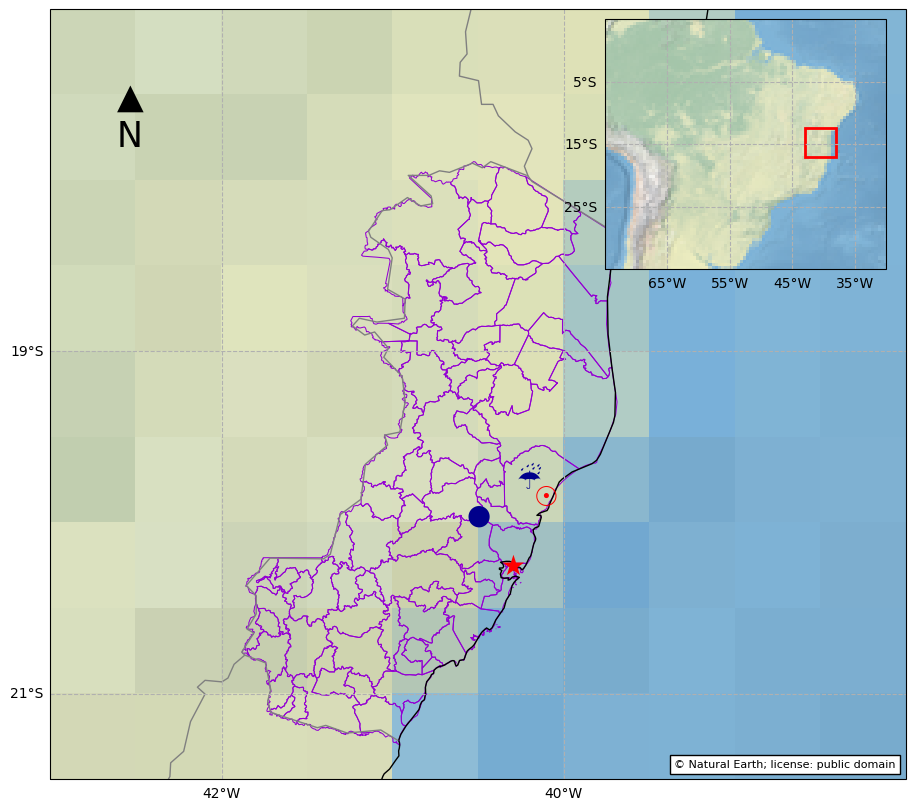

In [9]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader


def main():
    # Create a figure and subplots, one for the main map and one for the inset map
    fig = plt.figure(figsize=(12, 10))
    ax_main = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax_inset = fig.add_axes([0.61, 0.62, 0.25, 0.25], projection=ccrs.PlateCarree())
                            #x,y, , large

    # Set extent for the main map (Espírito Santo)
    ax_main.set_extent([-43, -38, -21.5, -17], crs=ccrs.PlateCarree())
    #map .json
    shapefile_path = shpreader.natural_earth(resolution='10m', category='cultural', name='admin_1_states_provinces_lines')
    shapefile = shpreader.Reader(shapefile_path).geometries()
    shapefile = list(shpreader.Reader(r'geojs-32-mun_ES.json').geometries())
    ax_main.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='darkviolet', facecolor='none', linewidth=0.75)


    
    # Put a background image on for nice sea rendering.
    ax_main.stock_img()

    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    # Add country borders
    countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

    ax_main.add_feature(cfeature.LAND)
    ax_main.add_feature(cfeature.COASTLINE)
    ax_main.add_feature(states_provinces, edgecolor='gray')
    ax_main.add_feature(countries, edgecolor='black')

    # Add a text annotation for the license information to the bottom right corner.
    text = AnchoredText('\u00A9 {}; license: {}'
                        ''.format('Natural Earth', 'public domain'),
                        loc=4, prop={'size': 8}, frameon=True)
    ax_main.add_artist(text)

    # Add gridlines to the main map
    gl_main = ax_main.gridlines(linestyle='--', xlocs=np.arange(-44, -37, 2), ylocs=np.arange(-21, 15, 2), draw_labels=True)
    gl_main.top_labels = False
    gl_main.right_labels = False

    # Plot points on the main map
    plot_points(ax_main)

    # Set extent for the inset map (Brazil)
    ax_inset.set_extent([-75, -30, -35, 5], crs=ccrs.PlateCarree())

    # Add background image for the inset map
    ax_inset.stock_img()

    # Add a rectangle on the inset map representing the area of analysis on the main map
    rect = plt.Rectangle((-43, -17), 5, 4.5, linewidth=2, edgecolor='red', facecolor='none', transform=ccrs.PlateCarree())
    ax_inset.add_patch(rect)

    # Add gridlines to the inset map with reduced linewidth
    gl_inset = ax_inset.gridlines(linestyle='--', xlocs=np.arange(-75, -29, 10), ylocs=np.arange(-35, 6, 10), draw_labels=True)
    gl_inset.top_labels = False
    gl_inset.right_labels = False
    gl_inset.xformatter = LongitudeFormatter(zero_direction_label=True)
    gl_inset.yformatter = LatitudeFormatter()

    # Adjust the linewidth of gridlines
    #for line in gl_inset.lines:
       # line.set_linewidth(0.5)
    

    
    plt.show()

def plot_points(ax):
    # Plotting points on the main map
    points = [
        (-20.3, -40.3, u'\u2605', 'red'),   # Vitória
        (-20.0, -40.5, u'\u25CF', 'darkblue'),  # Vila Velha
        (-19.8, -40.2, u'\u2614', 'darkblue'),  # Serra
        (-19.9, -40.1, u'\u2609', 'red')   # Cariacica
    ]

    for lat, lon, symbol, color in points:
        ax.annotate(symbol, ha='center', color=color, fontsize=20, xy=(lon, lat), transform=ccrs.PlateCarree())
        
    # Configuring the north arrow for the main map
    ax.annotate(u'\u25B2 \nN ', ha='center', fontsize=25, xy=(-42.5, -17.8))
    
if __name__ == '__main__':
    main()

